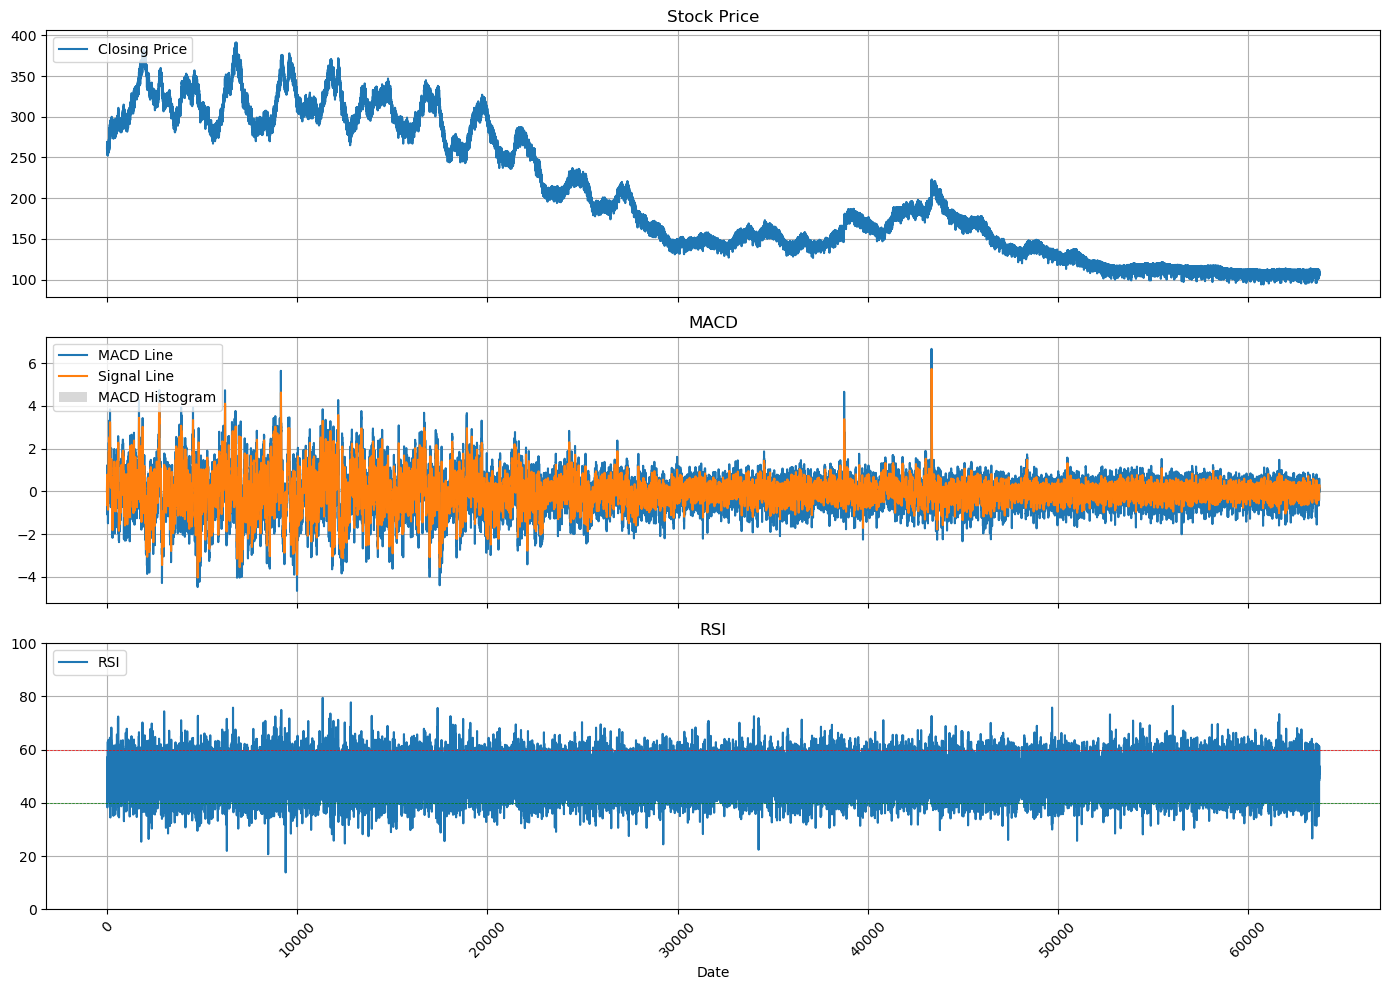

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'data_min_total.csv')

def plot_stock_indicators(df):
    # 创建图形和轴对象
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

    # 第一个轴绘制收盘价
    ax1.plot(df.index, df['Closing_Price'], label='Closing Price')
    ax1.set_title('Stock Price')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # 第二个轴绘制MACD线、信号线和直方图
    ax2.plot(df.index, df['MACD'], label='MACD Line')
    ax2.plot(df.index, df['MACD_signal'], label='Signal Line')
    ax2.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.3)
    ax2.set_title('MACD')
    ax2.legend(loc='upper left')
    ax2.grid(True)

    # 第三个轴绘制RSI
    ax3.plot(df.index, df['RSI'], label='RSI')
    ax3.axhline(60, color='red', linestyle='--', linewidth=0.5)  # 添加超买线
    ax3.axhline(40, color='green', linestyle='--', linewidth=0.5)  # 添加超卖线
    ax3.set_title('RSI')
    ax3.set_ylim([0, 100])  # 设置y轴范围
    ax3.legend(loc='upper left')
    ax3.grid(True)

    # 设置x轴标签
    plt.xticks(rotation=45)
    plt.xlabel('Date')

    # 显示图表
    plt.tight_layout()
    plt.show()

plot_stock_indicators(df)


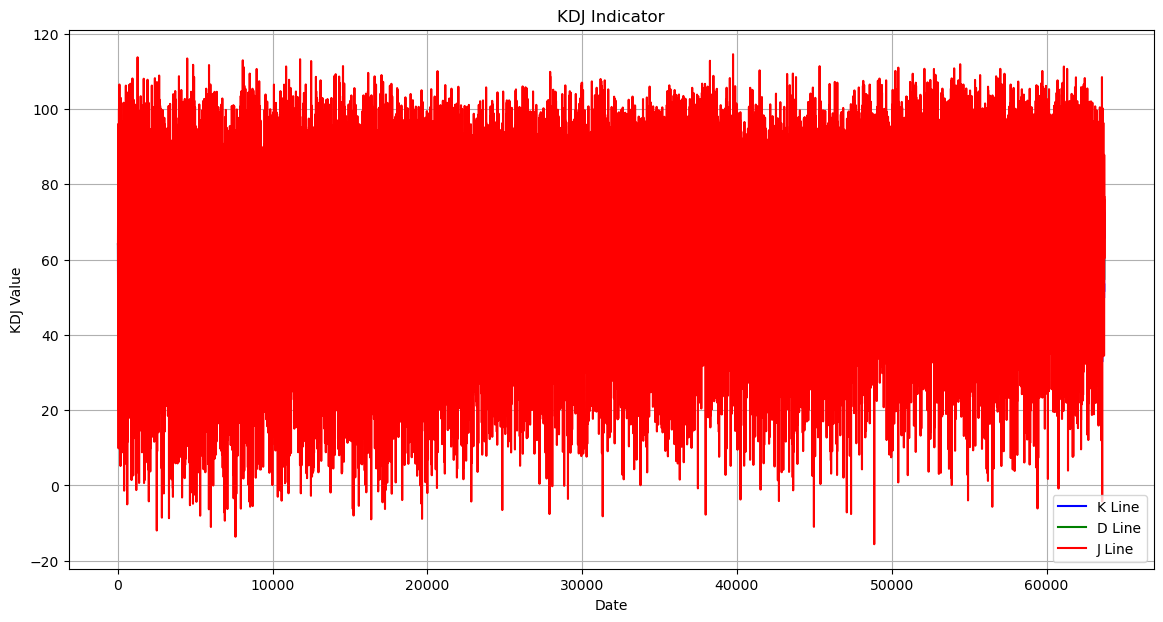

In [2]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['KDJ_K'], label='K Line', color='blue')
plt.plot(df.index, df['KDJ_D'], label='D Line', color='green')
plt.plot(df.index, df['KDJ_J'], label='J Line', color='red')
plt.title('KDJ Indicator')
plt.legend()
plt.xlabel('Date')
plt.ylabel('KDJ Value')
plt.grid(True)
plt.show()

In [2]:
import pandas as pd
import numpy as np



# 交易模拟
def simulate_trades(df):
    in_position = False
    buy_price = 0
    sell_price = 0
    trades = []
    trade_returns = []  # 存储每笔交易的收益率
    
    for index, row in df.iterrows():
        if not in_position and row['RSI'] < 45:
            in_position = True
            buy_price = row['Price_Mean']
            print(f"Bought at {buy_price} on {index}")
        
        elif in_position and row['RSI'] > 55:
            in_position = False
            sell_price = row['Price_Mean']
            profit = sell_price - buy_price
            trades.append(profit)
            # 计算收益率: (卖出价 - 买入价) / 买入价
            trade_return = profit / buy_price
            trade_returns.append(trade_return)
            print(f"Sold at {sell_price} on {index}, Profit: {profit}, Return: {trade_return:.2%}")
    
    return trades, trade_returns

trades, trade_returns = simulate_trades(df)

# 计算交易成功率
success_trades = [profit for profit in trades if profit > 0]
success_rate = len(success_trades) / len(trades) if trades else 0
total_return = sum(trade_returns)  # 计算总收益率
average_return = np.mean(trade_returns) if trade_returns else 0  # 计算平均收益率

print(f"Total Trades: {len(trades)}, Successful Trades: {len(success_trades)}, Success Rate: {success_rate * 100:.2f}%")
print(f"Total Return: {total_return:.2%}, Average Return per Trade: {average_return:.2%}")


Bought at 257.9 on 14
Sold at 262.09 on 19, Profit: 4.189999999999998, Return: 1.62%
Bought at 259.04 on 21
Sold at 260.54 on 35, Profit: 1.5, Return: 0.58%
Bought at 260.67 on 39
Sold at 257.7 on 42, Profit: -2.9700000000000273, Return: -1.14%
Bought at 259.08 on 47
Sold at 260.73 on 55, Profit: 1.650000000000034, Return: 0.64%
Bought at 260.61 on 56
Sold at 262.76 on 63, Profit: 2.1499999999999773, Return: 0.82%
Bought at 260.42 on 69
Sold at 259.3 on 70, Profit: -1.1200000000000045, Return: -0.43%
Bought at 265.26 on 100
Sold at 265.6 on 101, Profit: 0.34000000000003183, Return: 0.13%
Bought at 266.4 on 102
Sold at 269.55 on 106, Profit: 3.150000000000034, Return: 1.18%
Bought at 271.18 on 122
Sold at 274.18 on 125, Profit: 3.0, Return: 1.11%
Bought at 287.82 on 166
Sold at 287.26 on 167, Profit: -0.5600000000000023, Return: -0.19%
Bought at 284.66 on 172
Sold at 288.98 on 186, Profit: 4.319999999999993, Return: 1.52%
Bought at 288.04 on 196
Sold at 289.53 on 197, Profit: 1.48999999

In [4]:
import pandas as pd
import numpy as np

# A function that dynamically adjusts the RSI threshold
def dynamic_rsi_thresholds(volatility, base_buy=45, base_sell=55, sensitivity=0.5):
    # Adjusting RSI buy and sell thresholds based on volatility
    adjusted_buy = max(30, base_buy - sensitivity * volatility)
    adjusted_sell = min(70, base_sell + sensitivity * volatility)
    return adjusted_buy, adjusted_sell


# Trading simulation functions, now including dynamic RSI thresholds
def simulate_trades(df, base_buy=45, base_sell=55, sensitivity=0.5):
    df['Volatility'] = df['Price_Mean'].rolling(window=10).std()
    in_position = False
    buy_price = 0
    sell_price = 0
    trades = []
    trade_returns = []
    
    for index, row in df.iterrows():
        # 动态计算RSI阈值
        if pd.notna(row['Volatility']):  # 确保波动性非空
            dynamic_buy, dynamic_sell = dynamic_rsi_thresholds(row['Volatility'], base_buy, base_sell, sensitivity)
        else:
            dynamic_buy, dynamic_sell = base_buy, base_sell
        
        if not in_position and row['RSI'] < dynamic_buy:
            in_position = True
            buy_price = row['Price_Mean']
            print(f"Bought at {buy_price} on {index}, Dynamic Buy Threshold: {dynamic_buy}")
        
        elif in_position and row['RSI'] > dynamic_sell:
            in_position = False
            sell_price = row['Price_Mean']
            profit = sell_price - buy_price
            trades.append(profit)
            trade_return = profit / buy_price
            trade_returns.append(trade_return)
            print(f"Sold at {sell_price} on {index}, Profit: {profit}, Return: {trade_return:.2%}, Dynamic Sell Threshold: {dynamic_sell}")
    
    # 计算交易成功率
    successful_trades = [profit for profit in trades if profit > 0]
    success_rate = len(successful_trades) / len(trades) * 100 if trades else 0
    
    print(f"Total Trades: {len(trades)}")
    print(f"Successful Trades: {len(successful_trades)}")
    print(f"Success Rate: {success_rate:.2f}%")
    
    return trades, trade_returns, success_rate

# 模拟交易（示例数据）
# df = your_dataframe_here
# trades, trade_returns, success_rate = simulate_trades(df)
# 调用simulate_trades函数
trades, trade_returns, success_rate = simulate_trades(df)
total_return = sum(trade_returns)  # 计算总收益率
average_return = np.mean(trade_returns) if trade_returns else 0  # 计算平均收益率
print(f"Total Trades: {len(trades)}, Successful Trades: {len(success_trades)}, Success Rate: {success_rate * 100:.2f}%")
print(f"Total Return: {total_return:.2%}, Average Return per Trade: {average_return:.2%}")



Bought at 260.97 on 18, Dynamic Buy Threshold: 43.81602024698243
Sold at 260.54 on 35, Profit: -0.4300000000000068, Return: -0.16%, Dynamic Sell Threshold: 56.250342730792006
Bought at 260.67 on 39, Dynamic Buy Threshold: 44.00111784701318
Sold at 257.7 on 42, Profit: -2.9700000000000273, Return: -1.14%, Dynamic Sell Threshold: 55.71333352803731
Bought at 259.08 on 47, Dynamic Buy Threshold: 44.354477816888696
Sold at 260.73 on 55, Profit: 1.650000000000034, Return: 0.64%, Dynamic Sell Threshold: 55.782755992914886
Bought at 260.61 on 56, Dynamic Buy Threshold: 44.15450064064696
Sold at 262.76 on 63, Profit: 2.1499999999999773, Return: 0.82%, Dynamic Sell Threshold: 55.71560774481862
Bought at 265.26 on 100, Dynamic Buy Threshold: 43.9348212200132
Sold at 269.55 on 106, Profit: 4.2900000000000205, Return: 1.62%, Dynamic Sell Threshold: 55.927784248148185
Bought at 271.18 on 122, Dynamic Buy Threshold: 43.5133258595101
Sold at 274.18 on 125, Profit: 3.0, Return: 1.11%, Dynamic Sell Thre

In [20]:
import numpy as np
import pandas as pd

# 定义一个网格搜索函数，用于寻找最佳参数
def grid_search(df, buy_range, sell_range, sensitivity_range):
    best_success_rate = 0
    best_params = None
    for buy in buy_range:
        for sell in sell_range:
            for sensitivity in sensitivity_range:
                _, _, success_rate = simulate_trades(df, base_buy=buy, base_sell=sell, sensitivity=sensitivity)
                if success_rate > best_success_rate:
                    best_success_rate = success_rate
                    best_params = (buy, sell, sensitivity)
    return best_params, best_success_rate

# 定义模拟交易数据的DataFrame
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", periods=100, freq='D')
prices = np.random.normal(loc=100, scale=10, size=(100,))
rsi = np.random.uniform(low=20, high=80, size=(100,))
df = pd.DataFrame({'Date': dates, 'Price_Mean': prices, 'RSI': rsi})
df.set_index('Date', inplace=True)

# 设置参数范围
buy_range = np.arange(25, 50, 5)
sell_range = np.arange(60, 85, 5)
sensitivity_range = [0.25, 0.5, 0.75]

# 运行网格搜索
best_params, best_success_rate = grid_search(df, buy_range, sell_range, sensitivity_range)
print(f"Best Parameters: Buy={best_params[0]}, Sell={best_params[1]}, Sensitivity={best_params[2]}")
print(f"Best Success Rate: {best_success_rate:.2f}%")


Bought at 109.78737984105739 on 2023-01-03 00:00:00, Dynamic Buy Threshold: 25
Sold at 114.94079073157606 on 2023-01-17 00:00:00, Profit: 5.153410890518671, Return: 4.69%, Dynamic Sell Threshold: 61.458433293922006
Bought at 108.64436198859505 on 2023-01-23 00:00:00, Dynamic Buy Threshold: 30
Sold at 92.57834979593558 on 2023-01-24 00:00:00, Profit: -16.06601219265947, Return: -14.79%, Dynamic Sell Threshold: 62.84396358746804
Bought at 100.45758517301446 on 2023-01-27 00:00:00, Dynamic Buy Threshold: 30
Sold at 98.12816149974167 on 2023-01-28 00:00:00, Profit: -2.3294236732727995, Return: -2.32%, Dynamic Sell Threshold: 63.34417960077728
Bought at 115.32779214358457 on 2023-01-29 00:00:00, Dynamic Buy Threshold: 30
Sold at 103.78162519602174 on 2023-02-01 00:00:00, Profit: -11.546166947562838, Return: -10.01%, Dynamic Sell Threshold: 62.813832982239504
Bought at 101.5634896910398 on 2023-02-05 00:00:00, Dynamic Buy Threshold: 30
Sold at 96.12673182592047 on 2023-02-08 00:00:00, Profit

In [36]:
import pandas as pd
import numpy as np


# 基于RSI的交易模拟
def simulate_rsi_trades(prices, rsi, lower_threshold, upper_threshold):
    in_position = False
    buy_price = 0
    profits = []
    for price, rsi_value in zip(prices, rsi):
        if not in_position and rsi_value < lower_threshold:
            in_position = True
            buy_price = price
        elif in_position and rsi_value > upper_threshold:
            in_position = False
            profit = price - buy_price
            profits.append(profit)
    return np.sum(profits)

# 寻找最优RSI阈值的函数
def optimize_rsi_thresholds(prices, rsi_values):
    best_profit = -np.inf
    best_thresholds = (0, 0)
    for lower_threshold in range(10, 60, 2):
        for upper_threshold in range(50, 90, 2):
            if lower_threshold >= upper_threshold:
                continue
            profit = simulate_rsi_trades(prices, rsi_values, lower_threshold, upper_threshold)
            if profit > best_profit:
                best_profit = profit
                best_thresholds = (lower_threshold, upper_threshold)
    return best_thresholds, best_profit


# 优化阈值
best_thresholds, best_profit = optimize_rsi_thresholds(df['Price_Mean'], df['RSI'])
print(f"Best RSI Buy Threshold: {best_thresholds[0]}, Sell Threshold: {best_thresholds[1]}, Max Profit: {best_profit}")


Best RSI Buy Threshold: 46, Sell Threshold: 52, Max Profit: 3207.3100000000013


In [34]:
import pandas as pd
import numpy as np


# 模拟MACD交易
def simulate_macd_trades(prices, macd_line, signal_line):
    in_position = False
    buy_price = 0
    trades = []
    trade_returns = []  # 存储每笔交易的收益率
    
    for price, macd, signal in zip(prices, macd_line, signal_line):
        if not in_position and macd > signal:
            in_position = True
            buy_price = price
            print(f"Bought at {price}")
        
        elif in_position and macd < signal:
            in_position = False
            sell_price = price
            profit = sell_price - buy_price
            trades.append(profit)
            # 计算收益率: (卖出价 - 买入价) / 买入价
            trade_return = profit / buy_price
            trade_returns.append(trade_return)
            print(f"Sold at {price}, Profit: {profit}, Return: {trade_return:.2%}")
    
    return trades, trade_returns

trades, trade_returns = simulate_macd_trades(df['Price_Mean'], df['MACD'], df['MACD_signal'])

# 计算交易成功率
success_trades = [profit for profit in trades if profit > 0]
success_rate = len(success_trades) / len(trades) if trades else 0
total_return = sum(trade_returns)  # 计算总收益率
average_return = np.mean(trade_returns) if trade_returns else 0  # 计算平均收益率

print(f"Total Trades: {len(trades)}, Successful Trades: {len(success_trades)}, Success Rate: {success_rate * 100:.2f}%")
print(f"Total Return: {total_return:.2%}, Average Return per Trade: {average_return:.2%}")


Bought at 260.39
Sold at 261.21, Profit: 0.8199999999999932, Return: 0.31%
Bought at 261.61
Sold at 262.39, Profit: 0.7799999999999727, Return: 0.30%
Bought at 263.37
Sold at 256.1, Profit: -7.269999999999982, Return: -2.76%
Bought at 265.29
Sold at 258.34, Profit: -6.9500000000000455, Return: -2.62%
Bought at 260.54
Sold at 260.61, Profit: 0.06999999999999318, Return: 0.03%
Bought at 261.52
Sold at 260.67, Profit: -0.8499999999999659, Return: -0.33%
Bought at 261.57
Sold at 259.08, Profit: -2.490000000000009, Return: -0.95%
Bought at 260.73
Sold at 259.23, Profit: -1.5, Return: -0.58%
Bought at 260.21
Sold at 261.03, Profit: 0.8199999999999932, Return: 0.32%
Bought at 259.3
Sold at 258.14, Profit: -1.160000000000025, Return: -0.45%
Bought at 261.98
Sold at 264.78, Profit: 2.7999999999999545, Return: 1.07%
Bought at 264.93
Sold at 267.05, Profit: 2.1200000000000045, Return: 0.80%
Bought at 269.55
Sold at 265.83, Profit: -3.7200000000000273, Return: -1.38%
Bought at 268.27
Sold at 269.6

In [31]:
import pandas as pd
import numpy as np


# 模拟交易
def simulate_kdj_trades(df):
    in_position = False
    buy_price = 0
    trades = []
    
    for index, row in df.iterrows():
        if not in_position and row['KDJ_K'] > row['KDJ_D'] and row['KDJ_K'] < 40 and row['KDJ_D'] < 40:
            in_position = True
            buy_price = row['Price_Mean']
            print(f"Bought at {buy_price} on {index}")
        
        elif in_position and row['KDJ_K'] < row['KDJ_D'] and row['KDJ_K'] > 60 and row['KDJ_D'] > 60:
            in_position = False
            sell_price = row['Price_Mean']
            profit = sell_price - buy_price
            trades.append(profit)
            print(f"Sold at {sell_price} on {index}, Profit: {profit}")
    
    return trades

trades = simulate_kdj_trades(df)

# 计算交易成功率
success_trades = [profit for profit in trades if profit > 0]
success_rate = len(success_trades) / len(trades) if trades else 0
print(f"Total Trades: {len(trades)}, Successful Trades: {len(success_trades)}, Success Rate: {success_rate * 100:.2f}%")


Bought at 367.78 on 2008
Sold at 370.11 on 2030, Profit: 2.330000000000041
Bought at 358.59 on 2046
Sold at 358.28 on 2065, Profit: -0.3100000000000023
Bought at 337.1 on 2225
Sold at 326.43 on 2261, Profit: -10.670000000000016
Bought at 324.47 on 2434
Sold at 323.28 on 2468, Profit: -1.1900000000000546
Bought at 345.53 on 2856
Sold at 337.23 on 2906, Profit: -8.299999999999955
Bought at 314.0 on 2977
Sold at 321.86 on 3009, Profit: 7.860000000000014
Bought at 322.1 on 3164
Sold at 323.68 on 3187, Profit: 1.579999999999984
Bought at 321.89 on 3312
Sold at 310.99 on 3383, Profit: -10.899999999999977
Bought at 297.6 on 3500
Sold at 295.71 on 3551, Profit: -1.8900000000000432
Bought at 288.12 on 3566
Sold at 287.37 on 3587, Profit: -0.75
Bought at 330.93 on 4050
Sold at 338.61 on 4066, Profit: 7.680000000000007
Bought at 333.26 on 4092
Sold at 339.57 on 4108, Profit: 6.310000000000002
Bought at 340.82 on 4666
Sold at 341.84 on 4680, Profit: 1.0199999999999818
Bought at 318.5 on 4769
Sold 